## Manual Tokenization

### Load Data

In [1]:
filename = '.\data\metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [2]:
text[:100]

'ï»¿One morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed'

In [3]:
# split into words by white space
words = text.split()
print(words[:100])

['ï»¿One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


### Select Words

In [4]:
import re

# split based on words only
words = re.split(r'\W+', text)
print(words[:100])

['ï', 'One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His']


running the example we can see that we get our list of words. This time, we can see
that armour-like is now two words armour and like (ne) but contractions like What's is also
two words What and s (not great).

### Split by Whitespace and Remove Punctuation

In [5]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


We can use regular expressions to select for the punctuation characters and use the sub() function to replace them with nothing.

In [6]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
print(words[16:25])
stripped = [re_punc.sub('', w) for w in words[16:25]]
print(stripped)

['bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his']
['bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his']


### Y hay otras transformaciones posibles...

## Tokenization and Cleaning with NLTK

In [7]:
import nltk


After installation, you will need to install the data used with the library, including a great set of documents that you can use later for testing other tools in NLTK. There are few ways to do this, such as from within a script:

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

A good useful first step is to split the text into sentences. Some modeling tasks prefer input
to be in the form of paragraphs or sentences, such as Word2Vec.
NLTK provides the sent tokenize() function to split text into sentences.

In [11]:
# split into sentences
from nltk import sent_tokenize

sentences = sent_tokenize(text)
print(sentences[0])

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\gcabreram/nltk_data'
    - 'C:\\Users\\gcabreram\\AppData\\Local\\Continuum\\anaconda3\\nltk_data'
    - 'C:\\Users\\gcabreram\\AppData\\Local\\Continuum\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\gcabreram\\AppData\\Local\\Continuum\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\gcabreram\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gcabreram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
sentences = sent_tokenize(text)
print(sentences[0])

ï»¿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


## Word Counts with CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


## Word Frequencies with TfidfVectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
'''
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
'''
text = ["The quick brown fox jumped over the lazy dog.",
"The nice frog",
"The cuqui doggy"]

In [20]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 11, 'quick': 10, 'brown': 0, 'fox': 4, 'jumped': 6, 'over': 9, 'lazy': 7, 'dog': 2, 'nice': 8, 'frog': 5, 'cuqui': 1, 'doggy': 3}
[1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.        ]


In [23]:
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 12)
[[0.34512915 0.         0.34512915 0.         0.34512915 0.
  0.34512915 0.34512915 0.         0.34512915 0.34512915 0.40767767]]


In [21]:
vocabulary_names = []
for key, value in vectorizer.vocabulary_.items():
    vocabulary_names.append(key)
vocabulary_names

['the',
 'quick',
 'brown',
 'fox',
 'jumped',
 'over',
 'lazy',
 'dog',
 'nice',
 'frog',
 'cuqui',
 'doggy']

In [22]:
'''
import plotly.express as px
import pandas as pd 

df = pd.DataFrame({'word': pd.Series(vocabulary_names), 'tfidf': pd.Series(vectorizer.idf_)}) 
# Here we use a column with categorical data
fig = px.histogram(df, x="day")
fig.show()
'''
import pandas as pd 

df = pd.DataFrame({'word': pd.Series(vocabulary_names), 'tfidf': pd.Series(vectorizer.idf_)}) 
df

,word,tfidf
0,the,1.693147
1,quick,1.693147
2,brown,1.693147
3,fox,1.693147
4,jumped,1.693147
5,over,1.693147
6,lazy,1.693147
7,dog,1.693147
8,nice,1.693147
9,frog,1.693147


### Test rápido: pruebo a obtener lo mismo para un texto que contenga cada palabra una sola vez, esperando que el tfidf sea mayor para la palabra menos común

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


### To check: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction


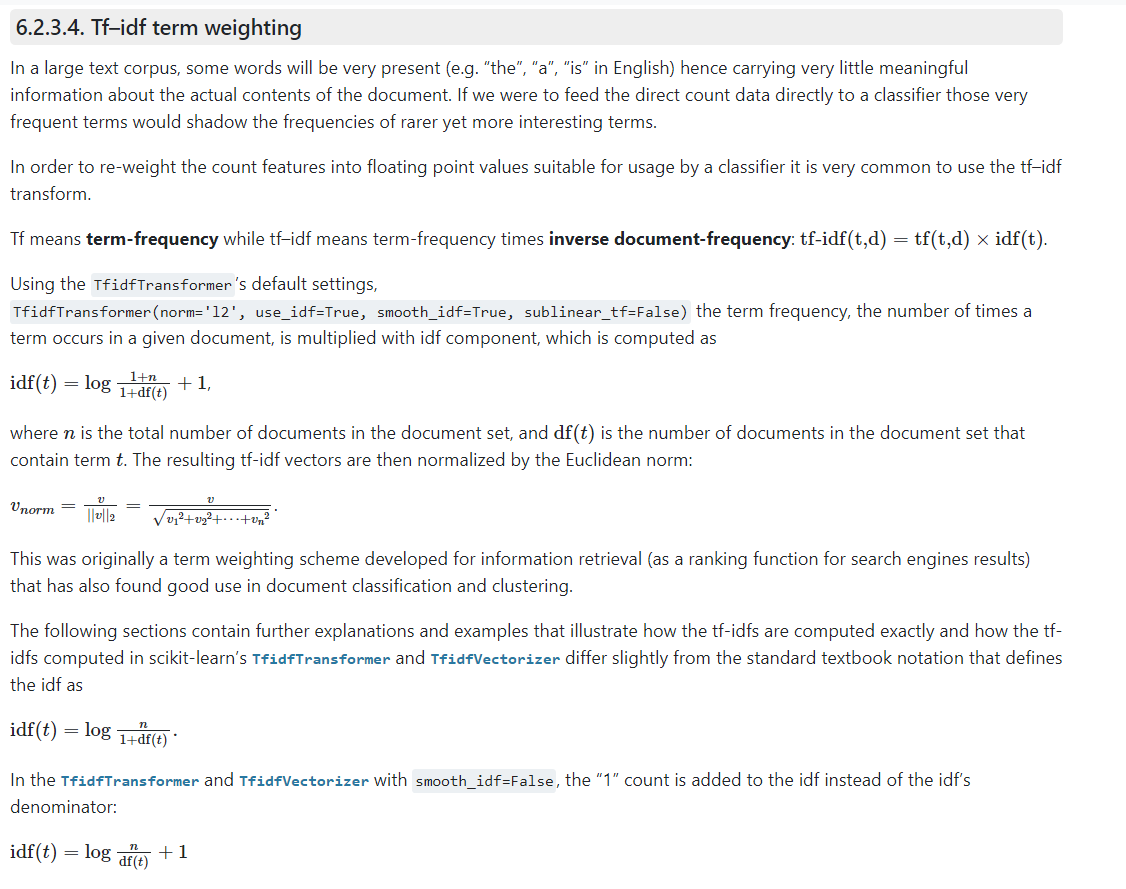

In [35]:
from IPython.display import Image
Image("./pics/tf_idf_scikit.png", width=3, height=5)

In [55]:
# tf-idf formula:
from numpy import log
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X)

['document', 'first', 'is', 'second', 'the', 'this']
  (0, 0)	0.40909010368335985
  (0, 1)	0.5749618667993135
  (0, 4)	0.40909010368335985
  (0, 2)	0.40909010368335985
  (0, 5)	0.40909010368335985
  (1, 3)	0.4691317250431934
  (1, 0)	0.6675821723880022
  (1, 4)	0.3337910861940011
  (1, 2)	0.3337910861940011
  (1, 5)	0.3337910861940011


In [62]:
n = 2
tf_idf_vector = []
# WORD 'this'
df_word_this = 2
idf_word_this_doc1 = log(n/df_word_this) + 1
tf_word_this_doc1 = 1

tf_idf_word_this_doc1 = tf_word_this_doc1*idf_word_this_doc1

tf_idf_vector.append(tf_idf_word_this_doc1)
tf_idf_word_this_doc1

1.0

In [63]:
# WORD 'is'
df_word_is = 2
idf_word_is_doc1 = log(n/df_word_is) + 1
tf_word_is_doc1 = 1

tf_idf_word_is_doc1 = tf_word_is_doc1*idf_word_is_doc1

tf_idf_vector.append(tf_idf_word_is_doc1)
tf_idf_word_is_doc1

1.0

In [64]:
# WORD 'first'
df_word_first = 1
idf_word_first_doc1 = log(n/df_word_first) + 1
tf_word_first_doc1 = 1

tf_idf_word_first_doc1 = tf_word_first_doc1*idf_word_first_doc1
tf_idf_vector.append(tf_idf_word_first_doc1)
tf_idf_word_first_doc1

1.6931471805599454

In [65]:
# WORD 'the'
df_word_the = 2
idf_word_the_doc1 = log(n/df_word_the) + 1
tf_word_the_doc1 = 1

tf_idf_word_the_doc1 = tf_word_the_doc1*idf_word_the_doc1
tf_idf_vector.append(tf_idf_word_the_doc1)
tf_idf_word_the_doc1

1.0

In [66]:
# WORD 'document'
df_word_document = 2
idf_word_document_doc1 = log(n/df_word_document) + 1
tf_word_document_doc1 = 1

tf_idf_word_document_doc1 = tf_word_document_doc1*idf_word_document_doc1
tf_idf_vector.append(tf_idf_word_document_doc1)
tf_idf_word_document_doc1

1.0

In [67]:
tf_idf_vector

[1.0, 1.0, 1.6931471805599454, 1.0, 1.0]

In [70]:
[np.square(x) for x in tf_idf_vector]

[1.0, 1.0, 2.8667473750380923, 1.0, 1.0]

In [71]:
tf_idf_vector_euclidean_norm = np.sqrt(np.sum([np.square(x) for x in tf_idf_vector])) #square root of the sum of the squares
tf_idf_vector_euclidean_norm


2.620447934044501

In [72]:
tf_idf_vector_normalized = np.divide(tf_idf_vector,tf_idf_vector_euclidean_norm)
tf_idf_vector_normalized

array([0.38161415, 0.38161415, 0.64612892, 0.38161415, 0.38161415])

#### El resultado es similar al dado por 'TfidfVectorizer', obteniendo mayor peso para la palabra 'first', salvo una diferencia dada quizás por algún factor extra

## Hashing with HashingVectorizer

In [1]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


### Mi test: quiero comprobar si una frase que contenga muchas palabras en común aporta un hashed vector similar

In [2]:
text_1 = ["This quick brown fox jumped over the lazy dog."]
text_2 = ["This is a quick brown fox jumped over the lazy dog."]
text_3 = ["This nice brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode documents
vector_1 = vectorizer.transform(text_1)
vector_2 = vectorizer.transform(text_2)
vector_3 = vectorizer.transform(text_3)
# summarize encoded vectors
print(vector_1.toarray())
print(vector_2.toarray())
print(vector_3.toarray())

[[ 0.          0.          0.37796447  0.          0.          0.37796447
   0.         -0.37796447  0.37796447  0.          0.          0.37796447
   0.          0.          0.         -0.37796447  0.          0.
  -0.37796447  0.        ]]
[[ 0.          0.          0.35355339  0.          0.          0.35355339
   0.         -0.35355339  0.35355339  0.          0.          0.35355339
   0.          0.          0.         -0.35355339  0.          0.35355339
  -0.35355339  0.        ]]
[[ 0.          0.          0.37796447  0.          0.          0.37796447
   0.         -0.37796447  0.37796447  0.          0.          0.37796447
   0.          0.          0.         -0.37796447  0.          0.
  -0.37796447  0.        ]]


### Como esperaba, la 1 y la 3 ofrecen resultados muy parecidos (en particular, iguales); si aumento el tamañoñ del hash vector quizás me dé valores distintos?

In [8]:
text_1 = ["This quick brown fox jumped over the lazy dog."]
text_2 = ["This is a quick brown fox jumped over the lazy dog."]
text_3 = ["This nice brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=25)
# encode documents
vector_1 = vectorizer.transform(text_1)
vector_2 = vectorizer.transform(text_2)
vector_3 = vectorizer.transform(text_3)
# summarize encoded vectors
print(vector_1.toarray()-vector_2.toarray())
print(vector_1.toarray()-vector_3.toarray())
#print(vector_3.toarray())

[[ 0.          0.         -0.31622777  0.01710557  0.          0.
   0.          0.01710557 -0.01710557  0.          0.01710557  0.01710557
  -0.01710557  0.01710557  0.         -0.01710557  0.          0.
  -0.01710557  0.          0.          0.          0.          0.
   0.        ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


## How to Prepare Text Data With Keras

Text data must be encoded as numbers to be used as input or output for machine learning and deep learning models, such as word embeddings

1. Split words with text to word sequence.
2. Encoding with one hot.
3. Hash Encoding with hashing trick.
4. Tokenizer API

In [10]:
from keras.preprocessing.text import text_to_word_sequence

'''
By
default, this function automatically does 3 things:
 Splits words by space
 Filters out punctuation
 Converts text to lowercase (lower=True)
'''

# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

Using TensorFlow backend.
['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


## Encoding with one hot 
The function returns an integer encoded version of the document

The use of a hash function means that there may be collisions and not all words will be assigned unique integer values. As with the text to word sequence() function in the previous section, the one hot() function will make the text lower case, filter out punctuation, and split words based on white space

First prints the size of the vocabulary as 8. The encoded document is then printed as an array of integer encoded words.

In [27]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print('vocab_size: {}'.format(vocab_size))
print('words: {}'.format(words))

vocab_size: 8
words: {'over', 'quick', 'lazy', 'brown', 'jumped', 'dog', 'the', 'fox'}


In [28]:
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

[8, 2, 2, 7, 5, 3, 8, 2, 8]


## Hash Encoding with hashing trick

A limitation of integer and count base encodings is that they must maintain a vocabulary of words and their mapping to integers. An alternative to this approach is to use a one-way hash function to convert words to integers.

In [26]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)


8
[6, 4, 1, 2, 7, 5, 6, 2, 6]


the use of a different hash function results in consistent, but different integers for words as the one hot() function in the previous section.

## Tokenizer API

This may be the preferred approach for large projects. Keras provides the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.

In [29]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [31]:
# summarize what was learned
print('word_counts: ', t.word_counts)
print('document_count: ', t.document_count)
print('word_index: ', t.word_index)
print('word_docs: ', t.word_docs)

word_counts:  OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
document_count:  5
word_index:  {'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
word_docs:  defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


In [32]:
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## How to Prepare Movie Review Data for Sentiment Analysis

* The dataset is comprised of only English reviews.
* All text has been converted to lowercase.
* There is white space around punctuation like periods, commas, and brackets.
* Text has been split into one sentence per line.

## Template for developing a function to clean all documents in a folder

In [36]:
from os import listdir
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load all docs in a directory
def process_docs(directory):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # load document
        doc = load_doc(path)
        print('Loaded %s' % filename)

# specify directory to load
directory = './data/txt_sentoken/neg'
process_docs(directory)

1.txt
Loaded cv123_12165.txt
Loaded cv124_3903.txt
Loaded cv125_9636.txt
Loaded cv126_28821.txt
Loaded cv127_16451.txt
Loaded cv128_29444.txt
Loaded cv129_18373.txt
Loaded cv130_18521.txt
Loaded cv131_11568.txt
Loaded cv132_5423.txt
Loaded cv133_18065.txt
Loaded cv134_23300.txt
Loaded cv135_12506.txt
Loaded cv136_12384.txt
Loaded cv137_17020.txt
Loaded cv138_13903.txt
Loaded cv139_14236.txt
Loaded cv140_7963.txt
Loaded cv141_17179.txt
Loaded cv142_23657.txt
Loaded cv143_21158.txt
Loaded cv144_5010.txt
Loaded cv145_12239.txt
Loaded cv146_19587.txt
Loaded cv147_22625.txt
Loaded cv148_18084.txt
Loaded cv149_17084.txt
Loaded cv150_14279.txt
Loaded cv151_17231.txt
Loaded cv152_9052.txt
Loaded cv153_11607.txt
Loaded cv154_9562.txt
Loaded cv155_7845.txt
Loaded cv156_11119.txt
Loaded cv157_29302.txt
Loaded cv158_10914.txt
Loaded cv159_29374.txt
Loaded cv160_10848.txt
Loaded cv161_12224.txt
Loaded cv162_10977.txt
Loaded cv163_10110.txt
Loaded cv164_23451.txt
Loaded cv165_2389.txt
Loaded cv166_1

## Clean Text Data
### Split into Tokens

In [37]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load the document
filename = './data/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)
# split into tokens by white space
tokens = text.split()
print(tokens)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', "what's", 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of'

Just looking at the raw tokens can give us a lot of ideas of things to try, such as:
* Remove punctuation from words (e.g. `what's').
* Removing tokens that are just punctuation (e.g. `-').
* Removing tokens that contain numbers (e.g. `10/10').
* Remove tokens that have one character (e.g. `a').
* Remove tokens that don't have much meaning (e.g. `and').

Some ideas:
* We can filter out punctuation from tokens using regular expressions.
* We can remove tokens that are just punctuation or contain numbers by using an isalpha()
check on each token.
* We can remove English stop words using the list loaded using NLTK.
* We can lter out short tokens by checking their length.

In [39]:
# Mi ejemplo con regex package:
import re

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
re_punc.sub('', 'hol.a')


'hola'

In [42]:
from nltk.corpus import stopwords
import string
import re

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load the document
filename = './data/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)
# split into tokens by white space
tokens = text.split()
# prepare regex for char filtering  # REVISAR EL MÓDULO DE REGEX
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
tokens = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mindfuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'didnt', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'whats', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scen

In [1]:
from nltk.metrics.distance import edit_distance

In [2]:
ey_master = 'ERNEST & YOUNG SL'
ey_text_2 = 'ERNST & YOUNG SA'
ey_text_3 = 'ERNST &YOUNG SL'
ey_text_4 = 'ERNST&YOUNG SL'
ey_text_5 = 'ERNTS & YOUNG SL'

minsait_text = 'MINSAIT by INDRA'

ey_tests_list = [ey_text_2, ey_text_3, ey_text_4, ey_text_5, minsait_text]

In [3]:
# COMPROBAMOS QUE LA DISTANCIA DE LA CADENA CORRECTA CONSIGO MISMA ES NULA:
if edit_distance(ey_master, ey_master)!=0:
    print('edit_distance function not validated')

In [4]:
for ey_text in ey_tests_list:
    dist_from_master = edit_distance(ey_text, ey_master)
    print('distancia entre {} y {}: {}'.format(ey_master, ey_text, dist_from_master)) 

distancia entre ERNEST & YOUNG SL y ERNST & YOUNG SA: 2
distancia entre ERNEST & YOUNG SL y ERNST &YOUNG SL: 2
distancia entre ERNEST & YOUNG SL y ERNST&YOUNG SL: 3
distancia entre ERNEST & YOUNG SL y ERNTS & YOUNG SL: 2
distancia entre ERNEST & YOUNG SL y MINSAIT by INDRA: 14


In [14]:
ey_text_2_r = ey_text_2.replace(' ', '')
ey_text_3_r = ey_text_3.replace(' ', '')

print('{}-->{}'.format(ey_text_2, ey_text_2_r))
print('{}-->{}'.format(ey_text_3, ey_text_3_r))

ERNST & YOUNG SA-->ERNST&YOUNGSA
ERNST &YOUNG SL-->ERNST&YOUNGSL


In [15]:
dist_2r_from_master = edit_distance(ey_text_2_r, ey_master)
dist_3r_from_master = edit_distance(ey_text_3_r, ey_master)

print('distancia entre {} y {}: {}'.format(ey_text_2_r, ey_master, dist_2r_from_master))
print('distancia entre {} y {}: {}'.format(ey_text_3_r, ey_master, dist_3r_from_master)) 

distancia entre ERNST&YOUNGSA y ERNEST & YOUNG SL: 5
distancia entre ERNST&YOUNGSL y ERNEST & YOUNG SL: 4
